<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/0530_Mental_Health_Dataton_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s4e11_path = kagglehub.competition_download('playground-series-s4e11')

print('Data source import complete.')


100%|██████████| 4.55M/4.55M [00:00<00:00, 64.4MB/s]

Extracting files...


Data source import complete.


# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:140%; font-family:Arial, sans-serif; background-color:#1C76B6; color:#DCD2C9; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.3);"><b> Mental Health </b></div>

# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#EB6A20; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.3);"><b> 1. Import Necessary Libraries </b></div>

In [4]:
!pip install squarify
!pip install category-encoders
!pip install catboost

# Core Libraries
import pandas as pd
import numpy as np
from scipy import stats
import random
import warnings

# Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import squarify
%matplotlib inline

# Machine Learning Libraries
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier

# Set random seed
rs = 1004

# Ignore warnings
warnings.filterwarnings("ignore")

# Set color palette for Seaborn
colors= ['#1c76b6', '#a7dae9', '#eb6a20', '#f59d3d', '#677fa0', '#d6e4ed', '#f7e9e5']
sns.set_palette(colors)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#EB6A20; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.3);"><b> 2. Reading and Understanding our Data </b></div>

In [5]:
# Read the train and test datasets using the downloaded path
df_train = pd.read_csv(f"{playground_series_s4e11_path}/train.csv")
df_test = pd.read_csv(f"{playground_series_s4e11_path}/test.csv")

print("First 5 rows of our dataset:")
df_train.head()

First 5 rows of our dataset:


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [6]:
print(f"There are {df_train.shape[1]} columns and {df_train.shape[0]} rows in the train dataset.")

There are 20 columns and 140700 rows in the train dataset.


In [7]:
print("Column names and data type of each column:")
df_train.dtypes

Column names and data type of each column:


,0
id,int64
Name,object
Gender,object
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


In [8]:
print("There are {} duplicates in the dataset.".format(df_train.duplicated().sum()))

There are 0 duplicates in the dataset.


In [9]:
print("Checking for missing values in each column:")
print(df_train.isnull().sum())

Checking for missing values in each column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                  

<Axes: title={'center': 'Visualizing Missing Value'}>

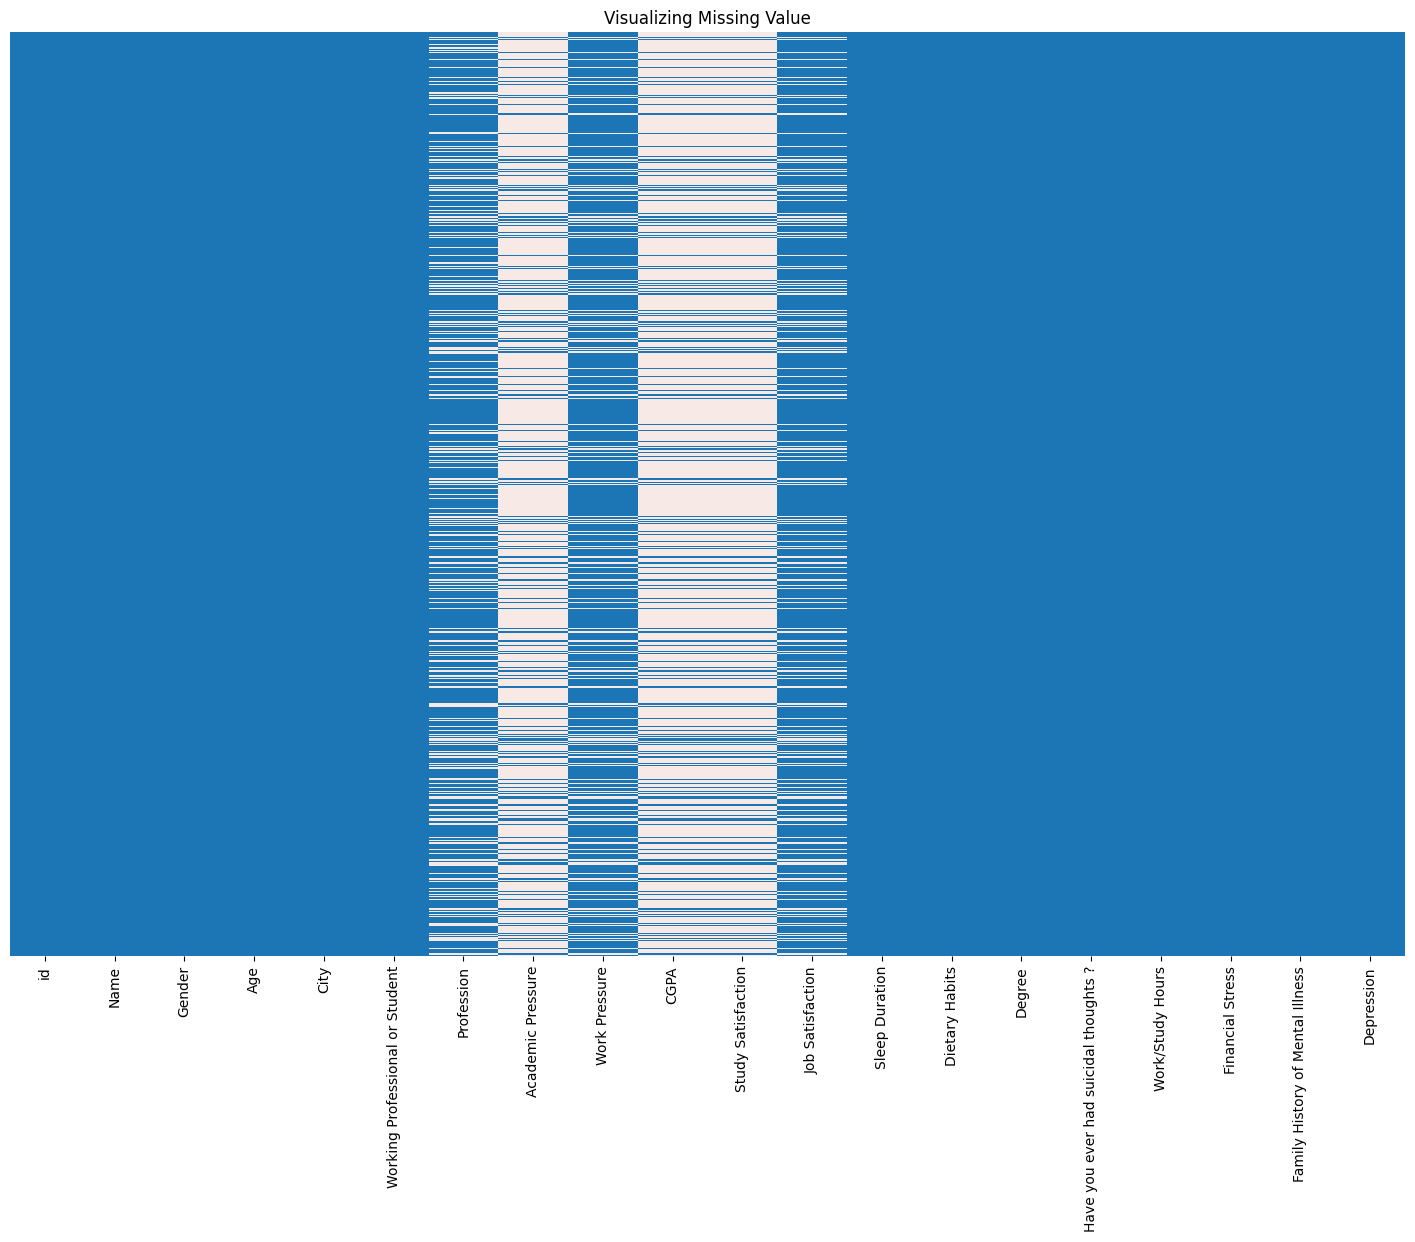

In [10]:
plt.figure(figsize = (18,12))
plt.title("Visualizing Missing Value")
sns.heatmap(df_train.isnull(), cbar = False, cmap = sns.color_palette(colors), yticklabels = False)

In [11]:
# save 'id'columns for submission
test_ids = df_test['id']

# Drop 'id ' columns in both datasets
df_train = df_train.drop(['id'], axis = 1)
df_test = df_test.drop(['id'], axis = 1)

# Define the target columns
target_column = 'Depression'

# Select categorical and numerical columns (initial)
categorical_columns = df_train.select_dtypes(include = ['object']).columns
numerical_columns = df_train.select_dtypes(exclude=['object']).columns.drop(target_column)

# Print out column infromation
print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())

Target Column: Depression

Categorical Columns: ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

Numerical Columns: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']


In [12]:
for column in categorical_columns:
  num_unique = df_train[column].nunique()
  print(f"'{column}' has {num_unique} unique categories ")

'Name' has 422 unique categories 
'Gender' has 2 unique categories 
'City' has 98 unique categories 
'Working Professional or Student' has 2 unique categories 
'Profession' has 64 unique categories 
'Sleep Duration' has 36 unique categories 
'Dietary Habits' has 23 unique categories 
'Degree' has 115 unique categories 
'Have you ever had suicidal thoughts ?' has 2 unique categories 
'Family History of Mental Illness' has 2 unique categories 


In [13]:
# print top 10 unique value counts for each categorical column
for column in categorical_columns:
      print(f"\nTop value counts in '{column}':\n{df_train[column].value_counts().head(10)}")


Top value counts in 'Name':
Name
Rohan          3178
Aarav          2336
Rupak          2176
Aaradhya       2045
Anvi           2035
Raghavendra    1877
Vani           1657
Tushar         1596
Ritvik         1589
Shiv           1568
Name: count, dtype: int64

Top value counts in 'Gender':
Gender
Male      77464
Female    63236
Name: count, dtype: int64

Top value counts in 'City':
City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Name: count, dtype: int64

Top value counts in 'Working Professional or Student':
Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

Top value counts in 'Profession':
Profession
Teacher             24906
Content Writer       7814
Architect            4370
Consultant           4229
HR Manager           4022
Pharmacist  

In [14]:
# The skewness of columns
df_train[numerical_columns].skew()

,0
Age,-0.217977
Academic Pressure,-0.133977
Work Pressure,0.018515
CGPA,-0.073636
Study Satisfaction,0.011764
Job Satisfaction,0.054361
Work/Study Hours,-0.128169
Financial Stress,0.035603


# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#EB6A20; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.3);"><b> 3. Exploratory Data Analysis </b></div>

## 3.1. Distribution of Numerical Variables


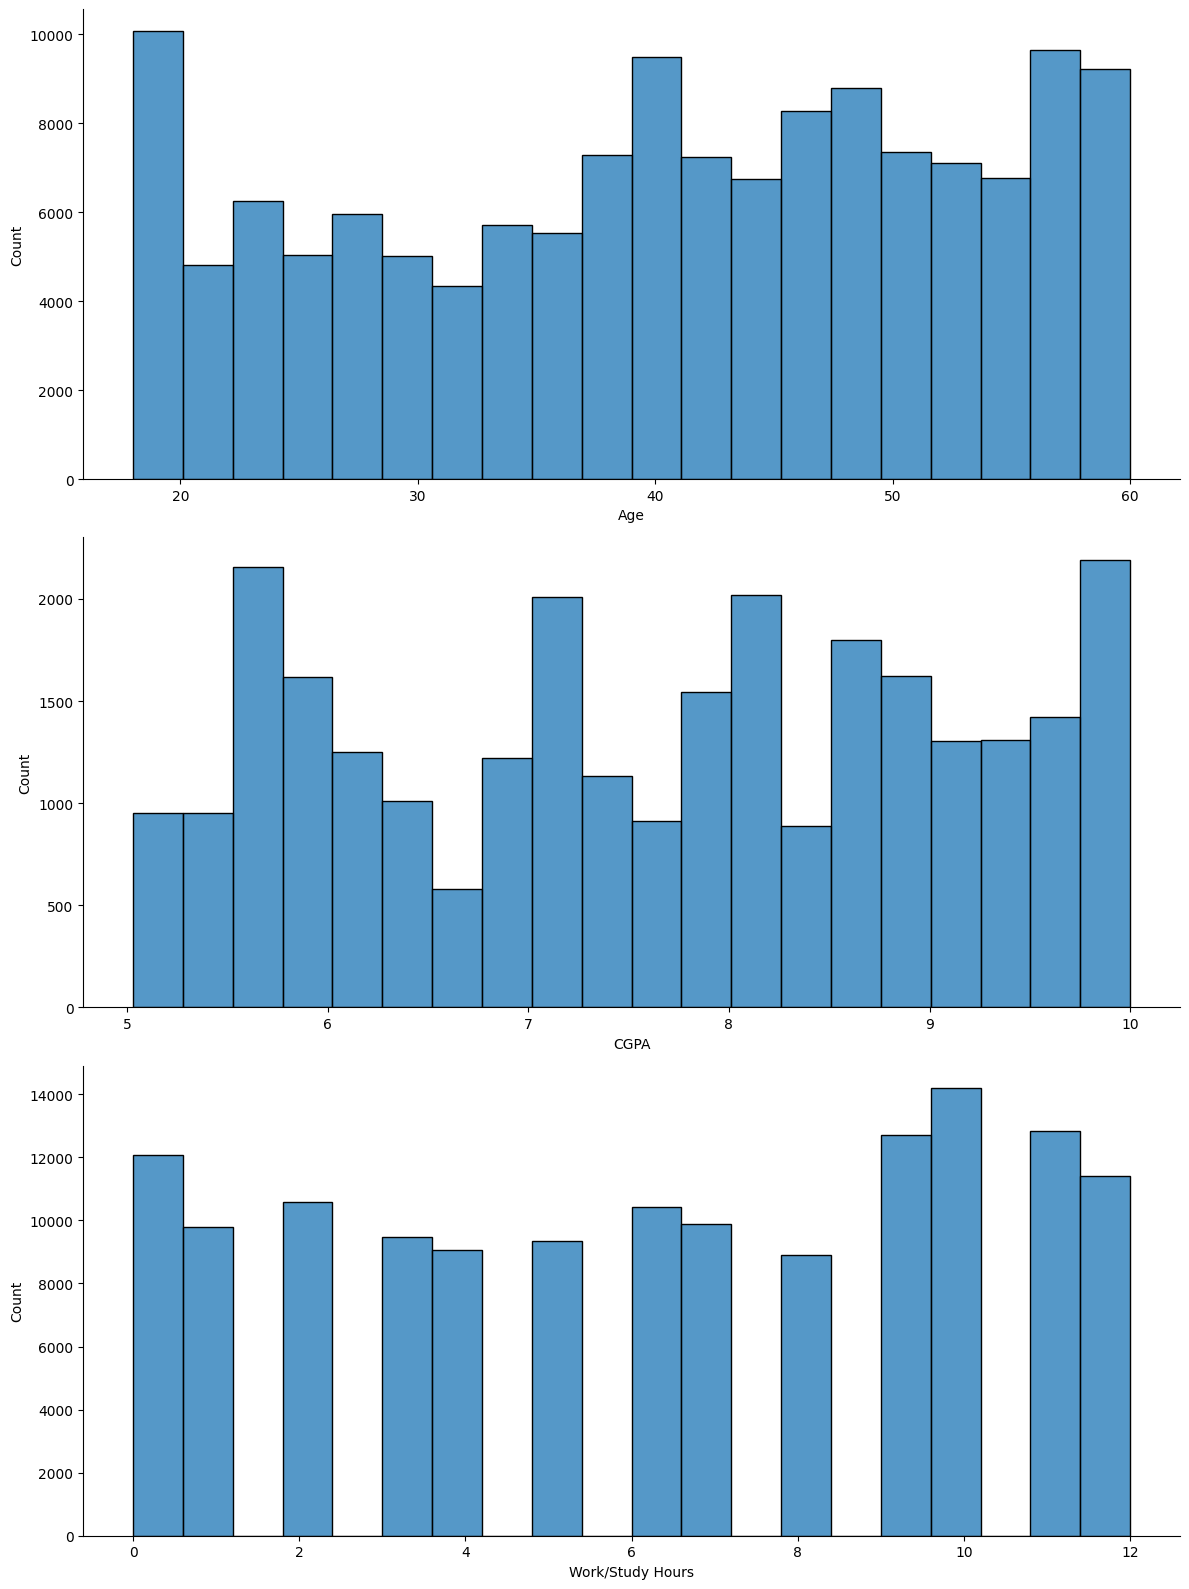

In [15]:
numerical_columns_to_plot = ["Age", "CGPA", "Work/Study Hours"]

plt.figure(figsize = (12,16))

for i, column in enumerate(numerical_columns_to_plot):
  plt.subplot(3,1,i+1)
  sns.histplot(data = df_train, x = column, kde = False, bins = 20, color = colors[0])
  sns.despine()

plt.tight_layout()
plt.show()

## 3.2. Distribution of Categorical Features


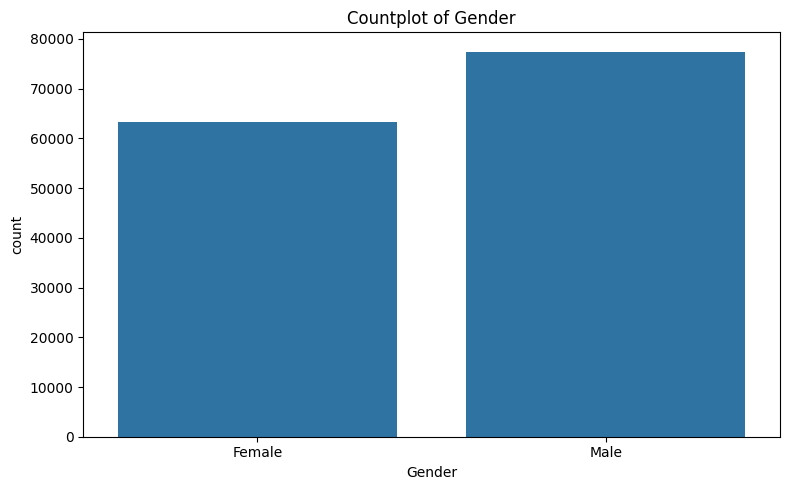

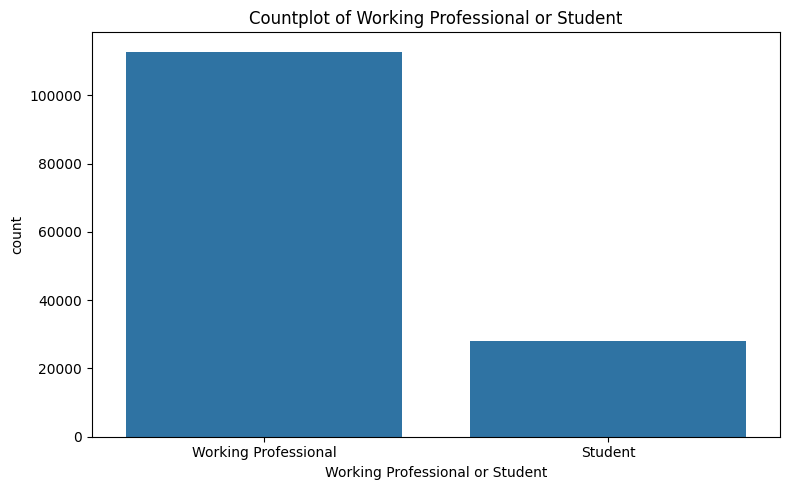

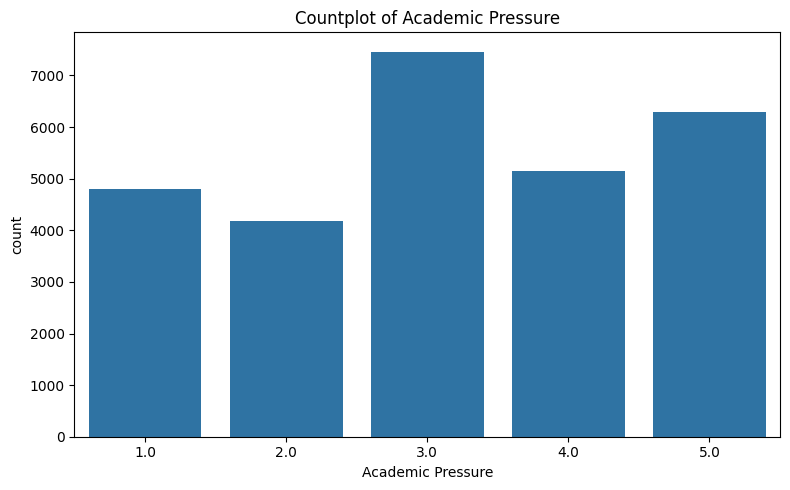

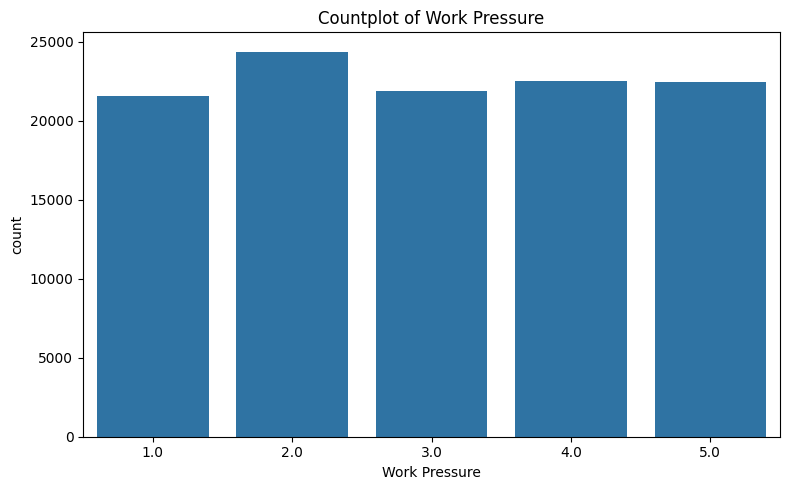

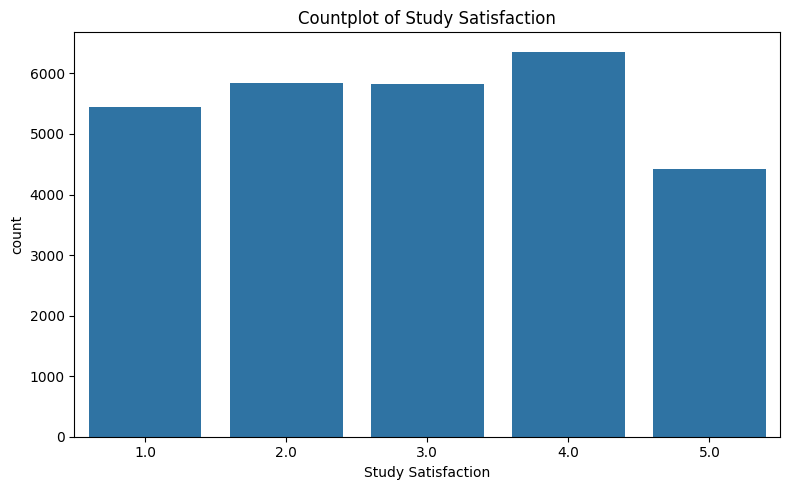

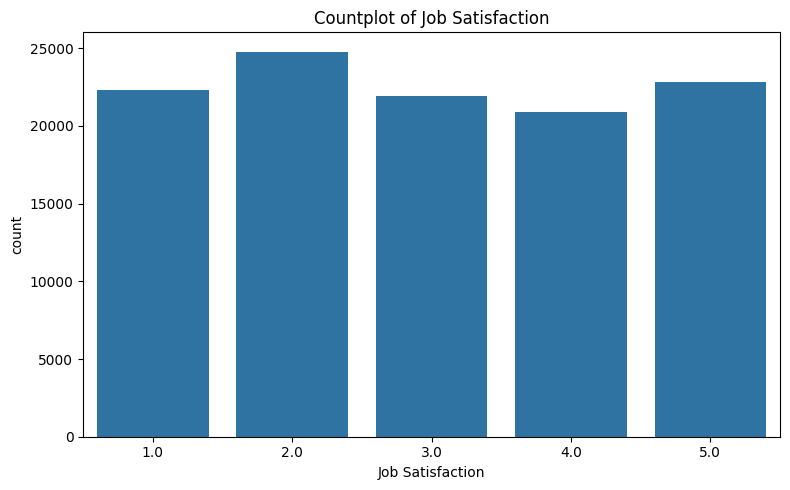

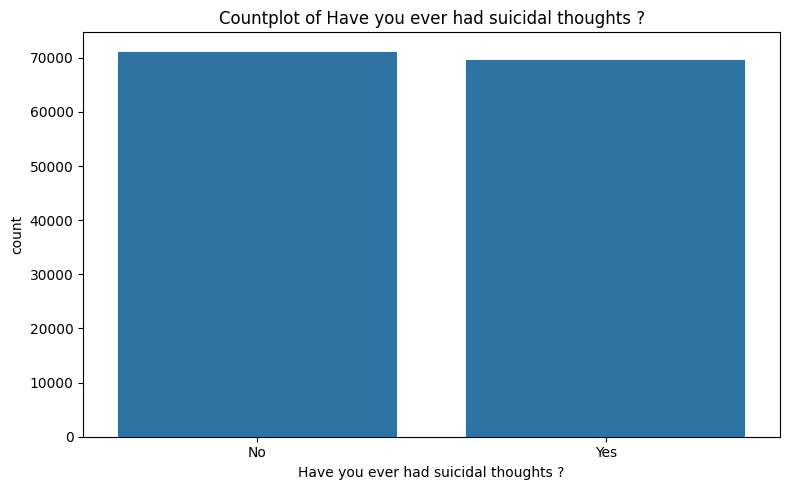

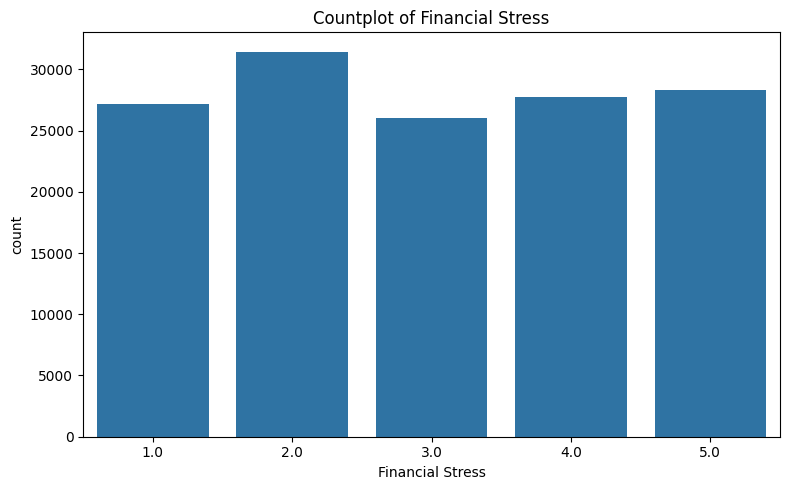

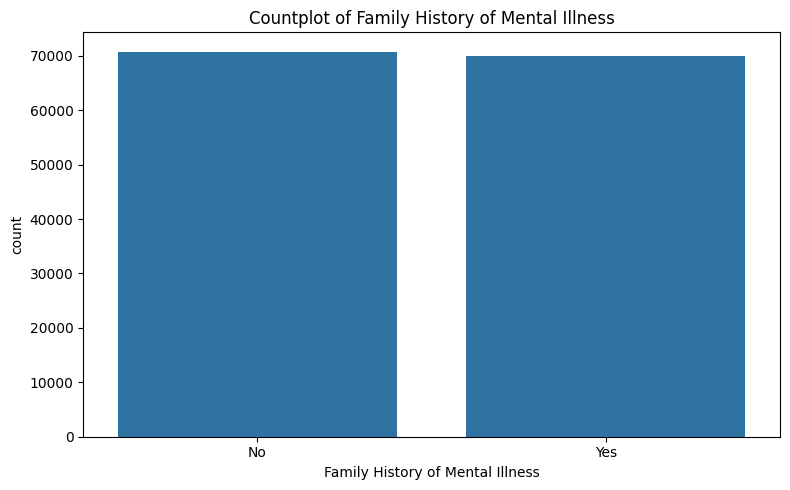

In [16]:
categorical_columns_to_plot = ['Gender', 'Working Professional or Student', 'Academic Pressure',
                       'Work Pressure', 'Study Satisfaction', 'Job Satisfaction',
                       'Have you ever had suicidal thoughts ?', 'Financial Stress',
                       'Family History of Mental Illness']

# plot countplots for each categorical column
for column in categorical_columns_to_plot:

  plt.figure(figsize = (8,5))
  sns.countplot(data = df_train, x = column)
  plt.title(f'Countplot of {column}')

  plt.tight_layout()
  plt.show()


## 3.3 Distribution of Numerical Features by Presence of Depression


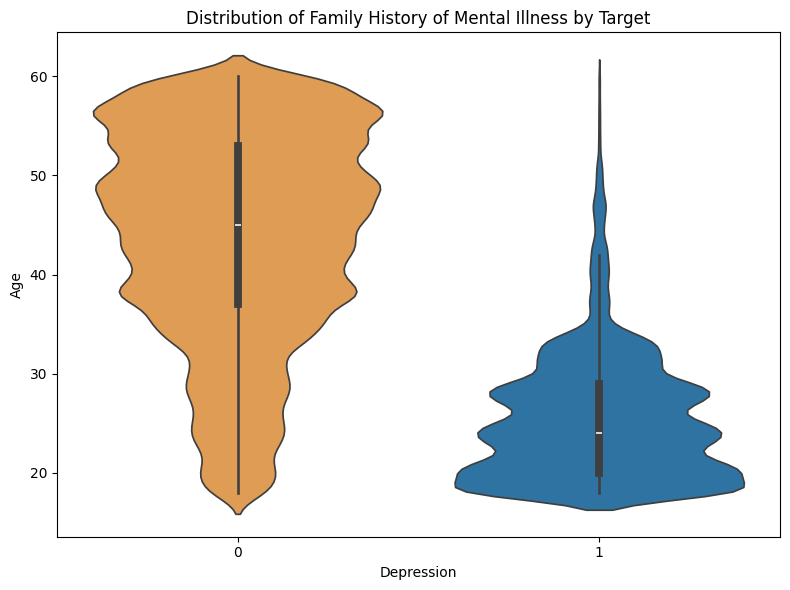

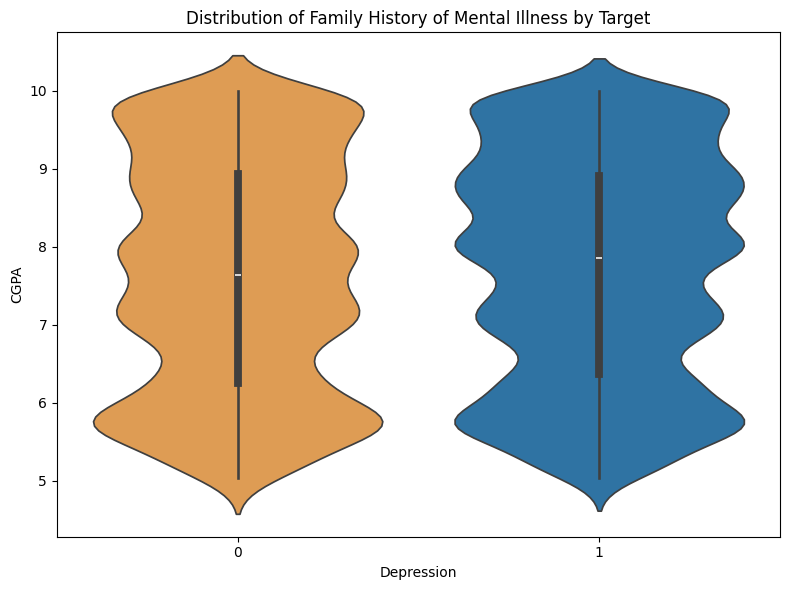

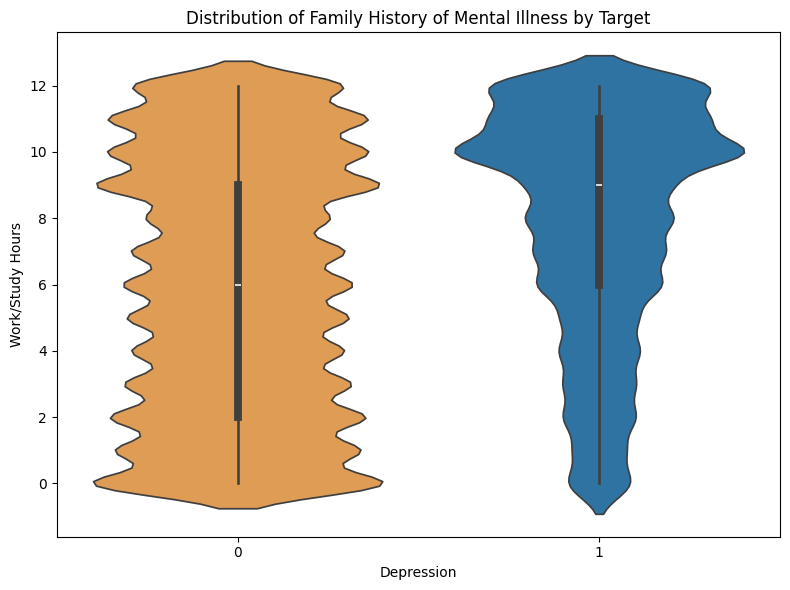

In [17]:
bi_palette = [colors[3], colors[0]]

for coulmn in numerical_columns_to_plot:
  plt.figure(figsize = (8,6))
  sns.violinplot(data = df_train, x = target_column, y = coulmn, palette = bi_palette)
  plt.title(f'Distribution of {column} by Target')

  plt.tight_layout()
  plt.show()

## 3.4. Relationship of Categorical Coulmns with a Target Variables

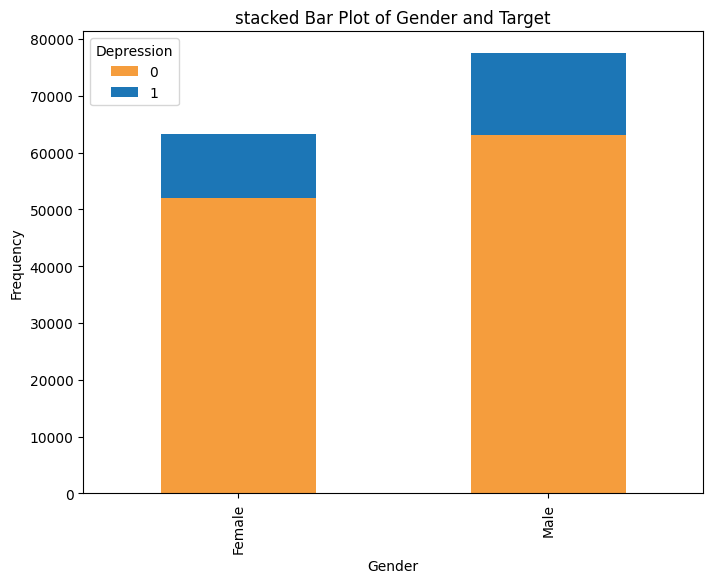

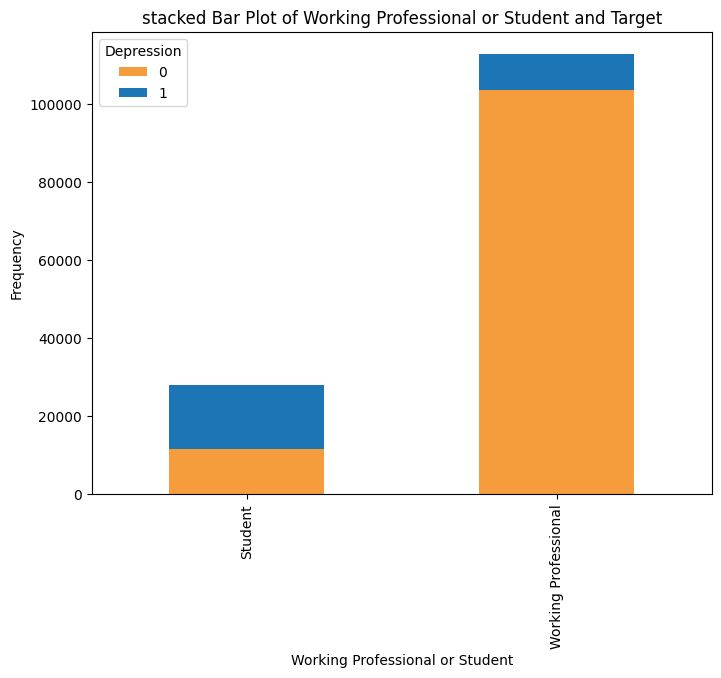

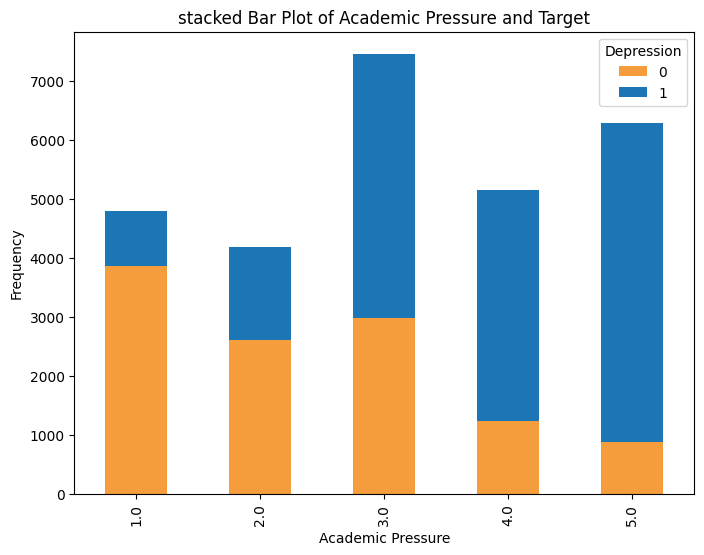

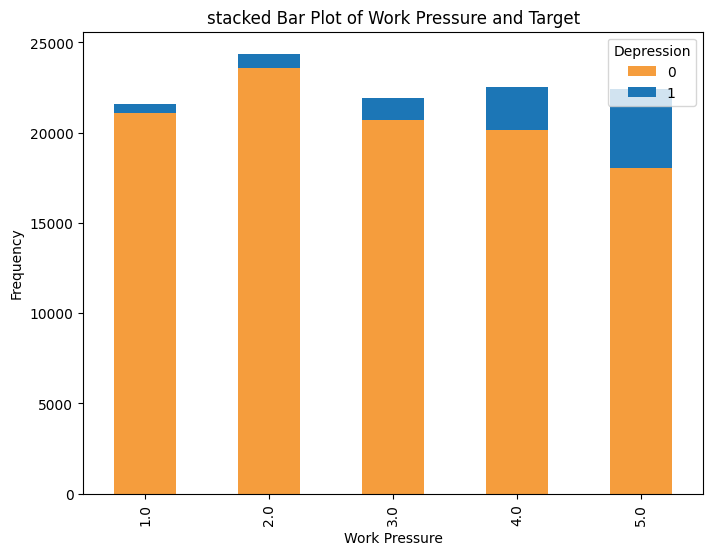

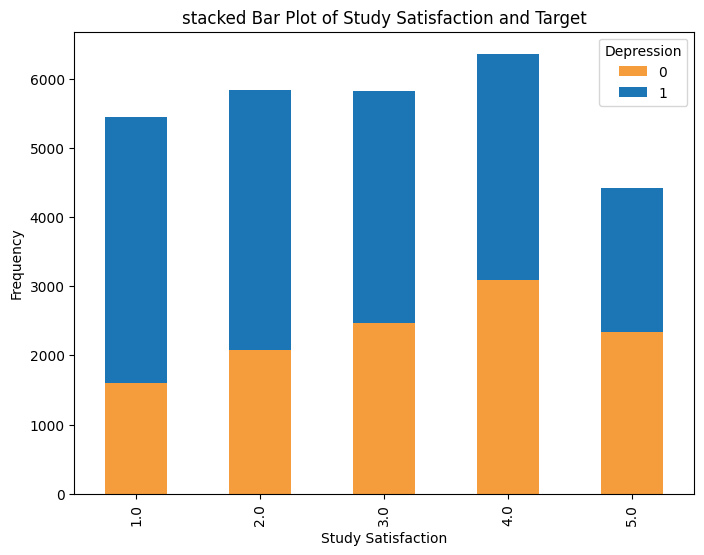

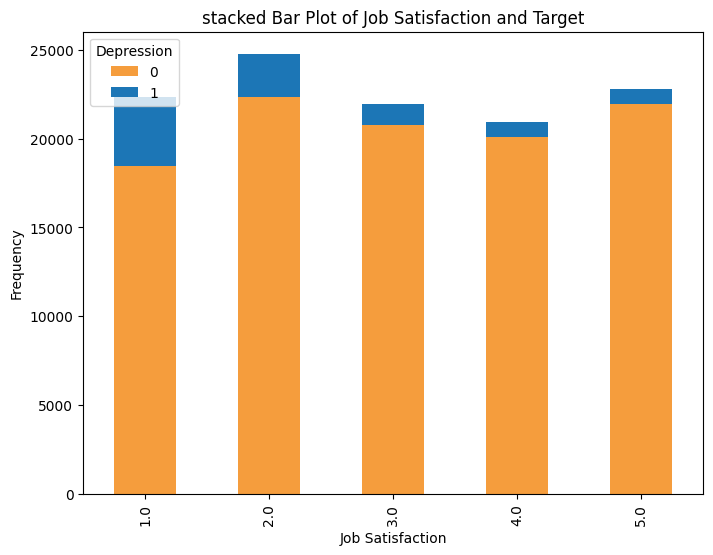

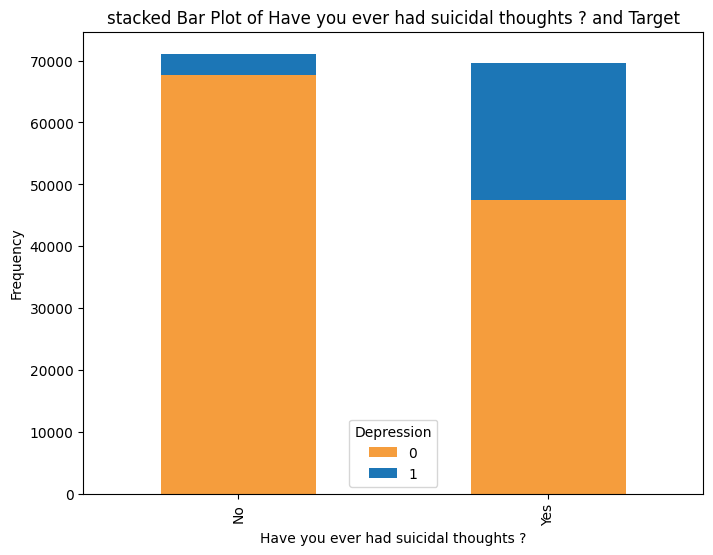

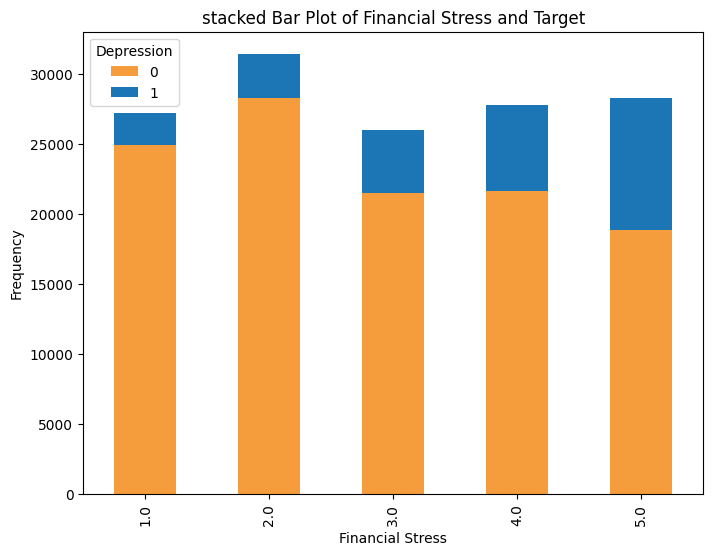

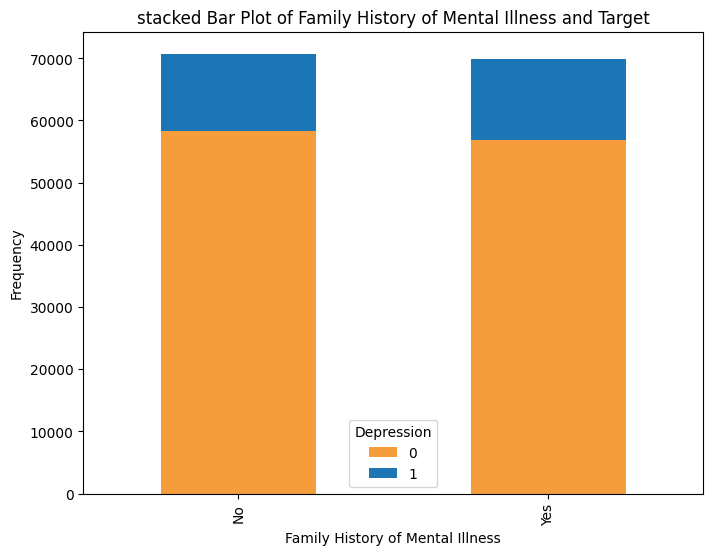

In [18]:
cmap = LinearSegmentedColormap.from_list("custom_cmap", bi_palette)

# Loop through each categorical column in your list
for column in categorical_columns_to_plot:
  # Stacked Bar plot
  pd.crosstab(df_train[column], df_train[target_column]).plot(kind='bar', stacked=True, colormap=cmap, figsize=(8, 6))
  plt.title(f"stacked Bar Plot of {column} and Target")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

## 3.5. Exploring Professions


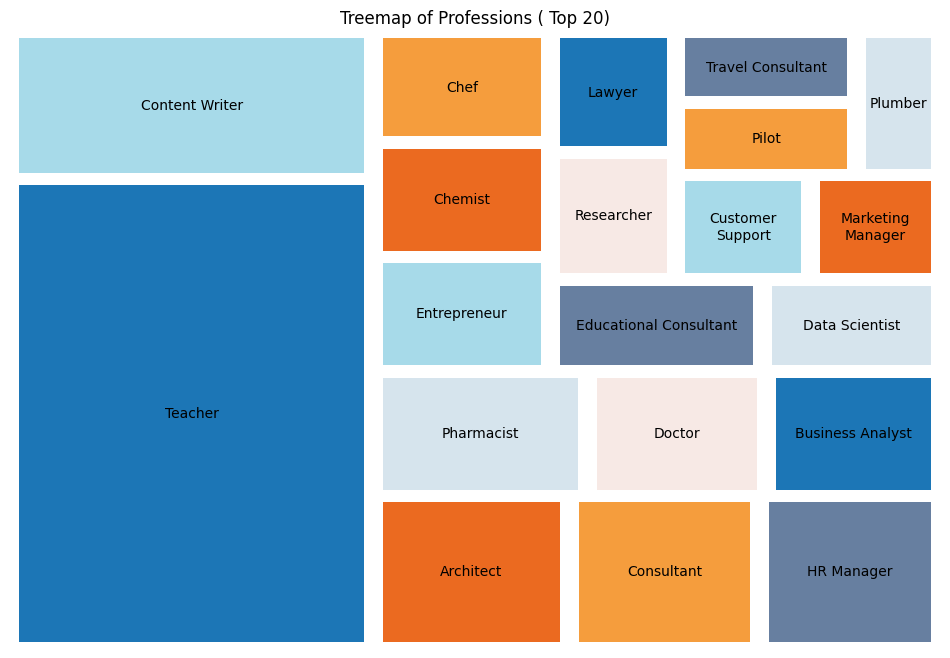

In [19]:
# Calculate frequences
value_counts = df_train['Profession'].value_counts()
sizes = value_counts.values[:20]

# Modify specific labels to showon two lines and limit to top 20 labels
labels = [
    "Customer\nSupport" if label == "Customer Support" else
    "Marketing\nManager" if label == "Marketing Manager" else
    label
    for label in value_counts.index[:20]
]

plt.figure(figsize = (12,8))
squarify.plot(sizes = sizes, label = labels, color = colors, pad = True)
plt.title(f"Treemap of Professions ( Top 20)")
plt.axis("off")
plt.show()

In [20]:
# Create a DataFrame for the top 20 professions and their relationship with depression
top_n_professions = 20
profession_counts = df_train['Profession'].value_counts().nlargest(top_n_professions)
filtered_data = df_train[df_train['Profession'].isin(profession_counts.index)]

# Create a summary DataFrame
sankey_data = filtered_data.groupby(['Profession', 'Depression']).size().reset_index(name='Count')

# Define the source and target for the Sankey chart
labels = list(sankey_data['Profession'].unique()) + ['No Depression', 'Depression']
source_indices = []
target_indices = []

for _, row in sankey_data.iterrows():
    profession_index = labels.index(row['Profession'])
    depression_index = labels.index('Depression' if row['Depression'] == 1 else 'No Depression')
    source_indices.append(profession_index)
    target_indices.append(depression_index)

# Create a Sankey chart
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color='blue'
    ),
    link=dict(
        source=source_indices,  # Indices correspond to labels, e.g., A=0, B=1, C=2...
        target=target_indices,
        value=sankey_data['Count']
    )
)])

fig.update_layout(
    title_text="Sankey Diagram of Profession and Depression",
    font_size=10,
    width=700,
    height=600)

fig.show()

## 3.6. Exploring Degrees

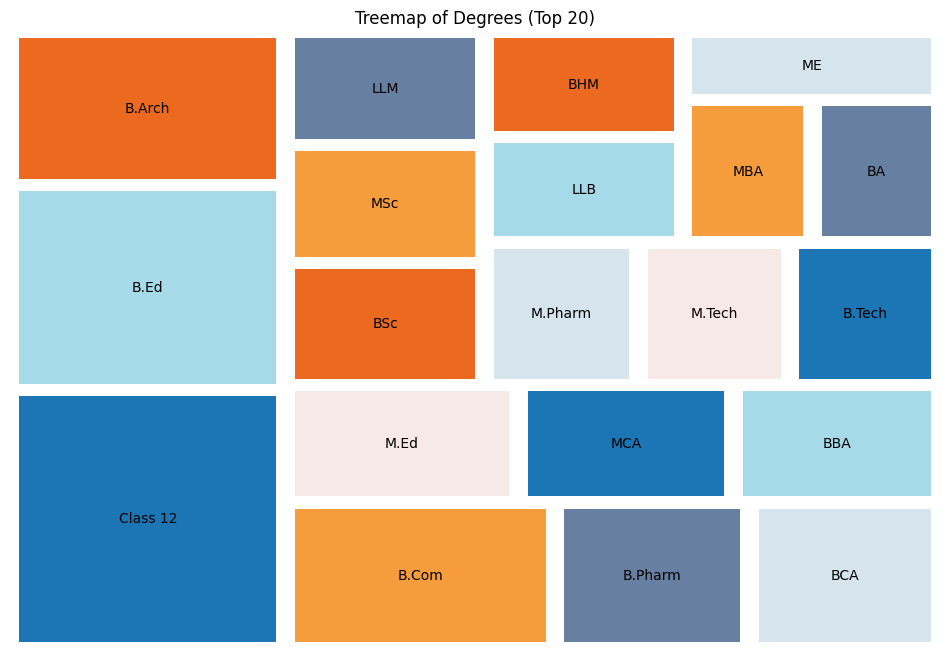

In [21]:
# Calculate frequencies
value_counts = df_train['Degree'].value_counts()
sizes = value_counts.values[:20]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=value_counts.index[:20], color=colors, pad=True)
plt.title(f"Treemap of Degrees (Top 20)")
plt.axis("off")
plt.show()

In [22]:
# Get the top 10 most common professions
top_professions = df_train['Degree'].value_counts().nlargest(10).index

# Filter the DataFrame for the top 10 professions
filtered_df = df_train[df_train['Degree'].isin(top_professions)]

# Create a new DataFrame for aggregation
agg_data = filtered_df.groupby(['Degree', 'Depression']).size().reset_index(name='Count')

# Create a sunburst chart
fig = px.sunburst(agg_data,
                  path=['Degree', 'Depression'],
                  values='Count',
                  title='Sunburst Chart of Top 10 Degrees and Depression',
                  color='Count',
                  color_continuous_scale=px.colors.sequential.Oranges[:])

# Show the figure
fig.show()

## 3.7. Distribution of a Target Variable

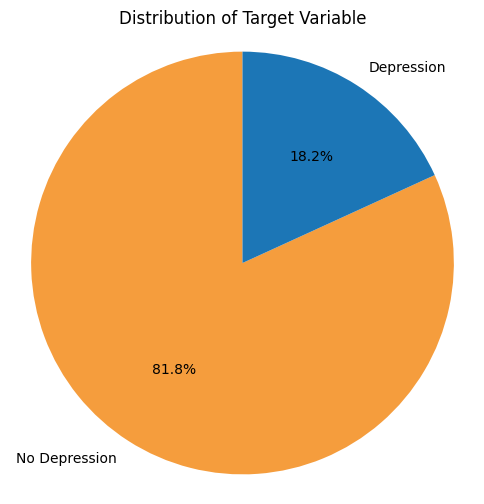

In [23]:
# Calculate counts for the pie chart and ass labels
class_counts = df_train[target_column].value_counts().sort_index()
labels = ["No Depression", "Depression"]
plt.figure(figsize = (6,6))
plt.pie(class_counts, colors = bi_palette, labels = labels,
        autopct = '%1.1f%%', startangle = 90)
plt.title('Distribution of Target Variable')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## 3.8. Correlation between Variables

In [24]:
# Calculate the correlation matrix
correlation_matrix = df_train.corr(numeric_only = True)

# Create an interactive heatmap with orange and blue colors
fig = px.imshow(correlation_matrix,
                text_auto = True, #Display correlation values
                color_continuous_scale = 'RdYlBu', # Color scale with shades of red, yellow, and blue
                title = 'Heatmap of Correlation Matirx',
                aspect = 'auto')
fig.show()

In [25]:
# Drop rows with NaN values
df_train_copy = df_train.dropna(subset=['Age', 'Work Pressure', 'Depression'])

# Create bins for Age and Work Pressure
df_train_copy['Age_bin'] = pd.cut(df_train_copy['Age'], bins=10).astype(str)           # Convert the bins to strings (to avoid serialization issues)
df_train_copy['WorkPressure_bin'] = pd.cut(df_train_copy['Work Pressure'], bins=10).astype(str)

# Create pivot table
heatmap_data = df_train_copy.pivot_table(index = 'Age_bin', columns='WorkPressure_bin', values='Depression', aggfunc='mean')

# Create an interactive heatmap with orange blue colors
fig = px.imshow(heatmap_data.values,
                labels=dict(x="Work Pressure Bin", y="Age Bin", color="Depression"),
                text_auto=True,  # Display correlation values
                color_continuous_scale='RdYlBu',  # Color scale with shades of red, yellow, and blue
                title='Heatmap of Depression by Age and Work Pressure',
                aspect='auto')
# Set y-axis ans X-axis
fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = list(range(len(heatmap_data.index))),  # Set tick positions
        ticktext = heatmap_data.index.astype(str).tolist() # Convert intervals to strings for labels

    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(range(len(heatmap_data.columns))),  # Set tick positions
        ticktext = heatmap_data.columns.astype(str).tolist() # Convert intervals to strings for labels
    )
)

fig.show()

# 4. Feature Engineering and Data Preprocessing

In [26]:
df_train['Age_WorkPressure'] = df_train['Age'] * df_train['Work Pressure']
df_test['Age_WorkPressure'] = df_test['Age'] * df_test['Work Pressure']

encoder = TargetEncoder(cols=['City', 'Profession'])
df_train[['City_encoded', 'Profession_encoded']] = encoder.fit_transform(df_train[['City', 'Profession']], df_train["Depression"])
df_test[['City_encoded', 'Profession_encoded']] = encoder.transform(df_test[['City', 'Profession']])

In [27]:
X_train = df_train.drop('Depression', axis=1)
y_train = df_train['Depression']

In [28]:
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()


In [29]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('convert_to_float32', FunctionTransformer(lambda x: x.astype(np.float32)))
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(dtype=np.int32, handle_unknown='use_encoded_value', unknown_value=-1))
])


In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

# Apply the transformations to the training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(df_test)

In [31]:
# Apply Isolation Forest for outlier detection on the training data
isolation_forest = IsolationForest(contamination=0.04, random_state=rs)
outlier_labels = isolation_forest.fit_predict(X_train_preprocessed)

# Filter out outliers from both X_train_preprocessed and y_train
non_outliers_mask = outlier_labels != -1
X_train_preprocessed = X_train_preprocessed[non_outliers_mask]
y_train = y_train[non_outliers_mask]

In [44]:
# 필요한 라이브러리 임포트 (Model Training 시작 전에 필요)
!pip install optuna
import optuna
from optuna.samplers import TPESampler # TPE 샘플러
from optuna.pruners import MedianPruner # Pruning을 위한 Median Pruner
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 필요한 라이브러리 임포트 (이전 셀에서 이미 임포트되었을 수 있지만, 여기서는 명시적으로)
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings

# 경고 무시 (CatBoost 등에서 발생할 수 있는 경고)
warnings.filterwarnings("ignore")

# 전처리된 데이터와 타겟 변수가 이미 준비되어 있다고 가정합니다.
# X_train_preprocessed, y_train 변수를 사용할 수 있습니다.

# 랜덤 시드 설정 (재현성을 위해)
rs = 1004

# StratifiedKFold를 사용하여 클래스 분포를 유지하면서 교차 검증
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)

# 하이퍼파라미터 튜닝 목표 함수 정의
def objective(trial):
    # Optuna Trial 객체를 사용하여 탐색할 하이퍼파라미터 범위 정의

    # XGBoost 하이퍼파라미터
    xgb_params = {
        'objective': 'binary:logistic', # 이진 분류
        'eval_metric': 'logloss', # 평가 지표
        'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 1500),
        'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 10),
        'gamma': trial.suggest_float('xgb_gamma', 0.0, 5.0),
        'subsample': trial.suggest_float('xgb_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('xgb_reg_alpha', 1e-8, 100.0, log=True), # L1 규제
        'reg_lambda': trial.suggest_float('xgb_reg_lambda', 1e-8, 100.0, log=True), # L2 규제
        'random_state': rs,
        'n_jobs': -1 # 병렬 처리
    }

    # CatBoost 하이퍼파라미터
    catboost_params = {
        'objective': 'BinaryLogloss', # 이진 분류
        'iterations': trial.suggest_int('cb_iterations', 100, 1500),
        'learning_rate': trial.suggest_float('cb_learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('cb_depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('cb_l2_leaf_reg', 1e-8, 100.0, log=True), # L2 규제
        'random_strength': trial.suggest_float('cb_random_strength', 1e-8, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('cb_bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('cb_border_count', 32, 255),
        'verbose': 0, # 튜닝 중에는 출력을 끕니다.
        'random_state': rs,
        'thread_count': -1, # 병렬 처리
        'allow_partial_history': True # Pruning을 위해 필요
    }

    # HistGradientBoostingClassifier 하이퍼파라미터
    hgb_params = {
        'loss': 'binary_crossentropy', # 이진 분류
        'learning_rate': trial.suggest_float('hgb_learning_rate', 0.01, 0.3, log=True),
        'max_iter': trial.suggest_int('hgb_max_iter', 100, 1000),
        'max_depth': trial.suggest_int('hgb_max_depth', 3, 10),
        'l2_regularization': trial.suggest_float('hgb_l2_regularization', 1e-8, 100.0, log=True), # L2 규제
        'early_stopping': True, # 조기 종료 활성화 (성능 향상이 없으면 중단)
        'random_state': rs,
        'n_iter_no_change': 50 # 성능 향상이 없을 때 종료까지 기다리는 횟수
    }

    # 모델 초기화
    xgb_model = XGBClassifier(**xgb_params, use_label_encoder=False)
    catboost_model = CatBoostClassifier(**catboost_params)
    hgb_model = HistGradientBoostingClassifier(**hgb_params)

    # 스태킹 앙상블 정의 (최종 모델은 고정하거나 함께 튜닝 가능)
    # 여기서는 최종 모델인 LogisticRegression의 C 값만 튜닝 예시로 추가
    stacking_ensemble = StackingClassifier(
        estimators=[
            ('catboost', catboost_model),
            ('xgb', xgb_model),
            ('hgb', hgb_model)
        ],
        final_estimator=LogisticRegression(C=trial.suggest_float('lr_C', 1e-4, 1e4, log=True), random_state=rs),
        passthrough=False # 기본 모델의 예측 결과만 최종 모델에게 전달
    )

    # 교차 검증을 통해 모델 성능 평가
    # StratifiedKFold와 make_scorer를 사용하여 정확도 평가
    # n_jobs=-1로 병렬 처리하여 속도 향상
    scorer = make_scorer(accuracy_score)
    try:
        cv_scores = cross_val_score(stacking_ensemble,
                                    X_train_preprocessed,
                                    y_train,
                                    cv=kf, # 5-겹 교차 검증
                                    scoring=scorer,
                                    n_jobs=-1) # 가능한 모든 코어로 병렬 처리

        # 평균 교차 검증 점수를 반환 (Optuna가 최대화할 값)
        mean_score = cv_scores.mean()

        # Study 레벨의 Pruner가 시도 전체의 진행 상황을 보고 Pruning을 결정합니다.
        return mean_score

    except Exception as e:
        # 오류 발생 시 -inf 반환 또는 예외 처리
        print(f"Trial failed due to: {e}")
        return -np.inf # 최소화 문제라면 np.inf 반환


In [50]:
def objective(trial):
    # Optuna Trial 객체를 사용하여 탐색할 하이퍼파라미터 범위 정의

    # XGBoost 하이퍼파라미터
    xgb_params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 1500),
        'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 10),
        'gamma': trial.suggest_float('xgb_gamma', 0.0, 5.0),
        'subsample': trial.suggest_float('xgb_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('xgb_reg_alpha', 1e-8, 100.0, log=True),
        'reg_lambda': trial.suggest_float('xgb_reg_lambda', 1e-8, 100.0, log=True),
        'random_state': rs,
        'n_jobs': -1
    }

    # CatBoost 하이퍼파라미터
    catboost_params = {
        'objective': 'BinaryLogloss',
        'iterations': trial.suggest_int('cb_iterations', 100, 1500),
        'learning_rate': trial.suggest_float('cb_learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('cb_depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('cb_l2_leaf_reg', 1e-8, 100.0, log=True),
        'random_strength': trial.suggest_float('cb_random_strength', 1e-8, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('cb_bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('cb_border_count', 32, 255),
        'verbose': 0,
        'random_state': rs,
        'thread_count': -1,
    }

    # HistGradientBoostingClassifier 하이퍼파라미터
    hgb_params = {
        'loss': 'binary_crossentropy',
        'learning_rate': trial.suggest_float('hgb_learning_rate', 0.01, 0.3, log=True),
        'max_iter': trial.suggest_int('hgb_max_iter', 100, 1000),
        'max_depth': trial.suggest_int('hgb_max_depth', 3, 10),
        'l2_regularization': trial.suggest_float('hgb_l2_regularization', 1e-8, 100.0, log=True),
        'early_stopping': True,
        'random_state': rs,
        'n_iter_no_change': 50
    }

    # 모델 초기화
    xgb_model = XGBClassifier(**xgb_params, use_label_encoder=False)
    catboost_model = CatBoostClassifier(**catboost_params)
    hgb_model = HistGradientBoostingClassifier(**hgb_params)

    # 스태킹 앙상블 정의
    stacking_ensemble = StackingClassifier(
        estimators=[
            ('catboost', catboost_model),
            ('xgb', xgb_model),
            ('hgb', hgb_model)
        ],
        final_estimator=LogisticRegression(C=trial.suggest_float('lr_C', 1e-4, 1e4, log=True), random_state=rs),
        passthrough=False
    )

    # 교차 검증을 통해 모델 성능 평가
    scorer = make_scorer(accuracy_score)
    try:
        cv_scores = cross_val_score(stacking_ensemble,
                                    X_train_preprocessed,
                                    y_train,
                                    cv=kf,
                                    scoring=scorer,
                                    n_jobs=-1)

        mean_score = cv_scores.mean()
        return mean_score

    except Exception as e:
        print(f"Trial failed due to: {e}")
        return -np.inf

# --- Optuna Study 생성 및 최적화 실행 ---

print("Optuna 최적화 시작...")

# Study 생성 (정확도 최대화)
# sampler와 pruner는 선택 사항이지만, 최적화 효율을 높이는 데 도움이 됩니다.
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=rs), pruner=MedianPruner())

# 최적화 실행
# n_trials는 시도할 하이퍼파라미터 조합의 총 개수입니다.
# 시간을 절약하고 싶다면 n_trials 값을 줄이거나 timeout 인자를 사용할 수 있습니다.
n_trials = 10
study.optimize(objective, n_trials=n_trials, show_progress_bar=True) # show_progress_bar=True로 진행 상황 확인

print("Optuna 최적화 완료.")
print("-" * 30)

# --- 최적 결과 확인 및 코드 반영 ---

print("최적의 하이퍼파라미터 조합:")
best_params = study.best_params
for key, value in best_params.items():
    print(f"  {key}: {value}")

print("-" * 30)
print(f"최적 성능 (평균 교차 검증 정확도): {study.best_value:.4f}")
print("-" * 30)

# 이제 얻은 best_params를 사용하여 모델 학습 코드에 반영할 수 있습니다.
# best_params 딕셔너리의 키 이름은 objective 함수에서 trial.suggest_* 메서드에 사용한 이름과 동일합니다.

# XGBoost, CatBoost, HGB, LogisticRegression 하이퍼파라미터로 분리
xgb_best_params = {k.replace('xgb_', ''): v for k, v in best_params.items() if k.startswith('xgb_')}
catboost_best_params = {k.replace('cb_', ''): v for k, v in best_params.items() if k.startswith('cb_')}
hgb_best_params = {k.replace('hgb_', ''): v for k, v in best_params.items() if k.startswith('hgb_')}
lr_best_params = {k.replace('lr_', ''): v for k, v in best_params.items() if k.startswith('lr_')}


print("\n코드에 반영할 각 모델의 최적 하이퍼파라미터:")
print("XGBoost:", xgb_best_params)
print("CatBoost:", catboost_best_params)
print("HistGradientBoosting:", hgb_best_params)
print("LogisticRegression (Final Estimator):", lr_best_params)

[I 2025-06-02 06:05:22,522] A new study created in memory with name: no-name-30242f5d-3f27-4c72-9eb9-d9e37e74c35b


Optuna 최적화 시작...


  0%|          | 0/10 [00:00<?, ?it/s]

Trial failed due to: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_stacking.py", line 717, in fit
    return super().fit(X, y_encoded, **fit_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estima

# 5. Model Training

In [34]:
# Define parameters
xgb_params = {
     'learning_rate': 0.298913248058474,
     'max_depth': 9,
     'min_child_weight': 3,
     'n_estimators': 673,
     'subsample': 0.5933970249700855,
     'gamma': 2.597137534750985,
     'reg_lambda': 0.11328048420927406,
     'colsample_bytree': 0.1381203919800721
}

catboost_params = {
    'iterations': 145,
    'depth': 7,
    'learning_rate': 0.29930179265937246,
    'l2_leaf_reg': 1.242352421942431,
    'random_strength': 8.325681754379957,
    'bagging_temperature': 0.7869848919618048,
    'border_count': 139
}

hgb_params = {
    'learning_rate': 0.16299202834206894,
    'max_iter': 250,
    'max_depth': 4,
    'l2_regularization': 7.1826466833939895,
    'early_stopping': True
}

# Initialize models with pre-tuned and trial-specific parameters
xgb_model = XGBClassifier(**xgb_params, use_label_encoder=False, random_state=rs)
# Remove task_type="GPU" to run CatBoost on CPU
catboost_model = CatBoostClassifier(**catboost_params, random_state=rs, verbose=0)
hgb_model = HistGradientBoostingClassifier(**hgb_params, random_state=rs)

# Define stacking ensemble with the LightGBM model tuned in this trial
stacking_ensemble = StackingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgb', xgb_model),
        ('hgb', hgb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=False
)

In [35]:
# Define a scoring metric
scoring = make_scorer(accuracy_score)

# Perform cross-validation
cv_scores = cross_val_score(stacking_ensemble, X_train_preprocessed, y_train, cv=5, scoring=scoring)

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.94166204 0.94329076 0.94199304 0.94269638 0.9450285 ]
Mean CV Accuracy: 0.9429
Standard Deviation of CV Accuracy: 0.0012


In [36]:
# Fit the model
stacking_ensemble.fit(X_train_preprocessed, y_train)

# Make predictions
test_preds = stacking_ensemble.predict(X_test_preprocessed)

In [37]:
# Create a DataFrame to hold the submission results
output = pd.DataFrame({'id': test_ids,
                       'class': test_preds})

# Save the output DataFrame to a CSV file
output.to_csv('submission.csv', index=False)

output.head()

,id,class
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
